In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the file

data = pd.read_csv('creditcard.csv')

In [3]:
# Getting an idea into the data

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Descriptive Statistics for every column

print(data.shape)
data.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Counting the non-fraud and fraud transaction.

Fraud_Transaction = data[data['Class']==1]
Non_Fraud_Transaction = data[data['Class']==0] # Valid transactions.

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Non Fraud Transactions: {}'.format(len(data[data['Class'] == 0])))
FraudPercentage = len(Fraud_Transaction)/float(len(Non_Fraud_Transaction))
print(FraudPercentage)

Fraud Cases: 492
Non Fraud Transactions: 284315
0.0017304750013189597


Out of all transactions, just 0.17% were fraudulent. 

In [7]:
# Dataset of Fraud Transactions

Fraud_Transaction

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [8]:
print('Details of the fraudulent transaction')
Fraud_Transaction.Amount.describe()

Details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
print('Details of valid transaction')
Non_Fraud_Transaction.Amount.describe()

Details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

### Train and Test Split
- We must first specify the dependent and independent variables before separating the train and test phases.
- Both the dependent and independent variables go by the names X and y.



In [11]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

(284807, 30)
(284807,)


Split the data into training and testing sets

In [12]:
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

### Model Building 

Now, testing several machine learning models one by one. 

In [13]:
# Decision Tree Model

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(xTrain, yTrain)
dt_yhat = DT.predict(xTest)

In [14]:
# Checking the accuracy of the model

print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(yTest, dt_yhat)))
print('F1 score of the Decision Tree model is {}'.format(f1_score(yTest, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9994382219725431
F1 score of the Decision Tree model is 0.8333333333333334


In [15]:
# K-Nearest Neighbours

n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(xTrain, yTrain)
knn_yhat = KNN.predict(xTest)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
# Accuracy for the K-Nearest Neighbors model
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(yTest, knn_yhat)))

# F1-Score for the K-Nearest Neighbors model
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(yTest, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9984375548611355
F1 score of the K-Nearest Neighbors model is 0.16822429906542058


In [17]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)
lr_yhat = lr.predict(xTest)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Accuracy of our Logistic Regression model.
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(yTest, lr_yhat)))

# F1-Score for the Logistic Regression model.
print('F1 score of the Logistic Regression model is {}'.format(f1_score(yTest, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9987886661282961
F1 score of the Logistic Regression model is 0.6101694915254237


In [19]:
# Support Vector Machines

svm = SVC()
svm.fit(xTrain, yTrain)
svm_yhat = svm.predict(xTest)

In [20]:
# Accuracy of our Support Vector Machines model.
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(yTest, svm_yhat)))

# F1-Score for the Support Vector Machines model.
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(yTest, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.9982795547909132
F1 score of the Support Vector Machines model is 0.0


In [21]:
# Random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
rf_yhat = rfc.predict(xTest)

In [22]:
# Accuracy of our Random Forest classifier model.
print('Accuracy score of the Random Forest classifier model is {}'.format(accuracy_score(yTest, rf_yhat)))

# F1-Score for the Random Forest classifier model.
print('F1 score of the Random Forest classifier model is {}'.format(f1_score(yTest, rf_yhat)))

Accuracy score of the Random Forest classifier model is 0.9995962220427653
F1 score of the Random Forest classifier model is 0.8685714285714285


In [23]:
# XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(xTrain, yTrain)
xgb_yhat = xgb.predict(xTest)

In [24]:
# Accuracy of our XGBoost model.
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(yTest, xgb_yhat)))

# F1-Score for the XGBoost model.
print('F1 score of the XGBoost model is {}'.format(f1_score(yTest, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995962220427653
F1 score of the XGBoost model is 0.871508379888268


[[56861     3]
 [   20    78]]


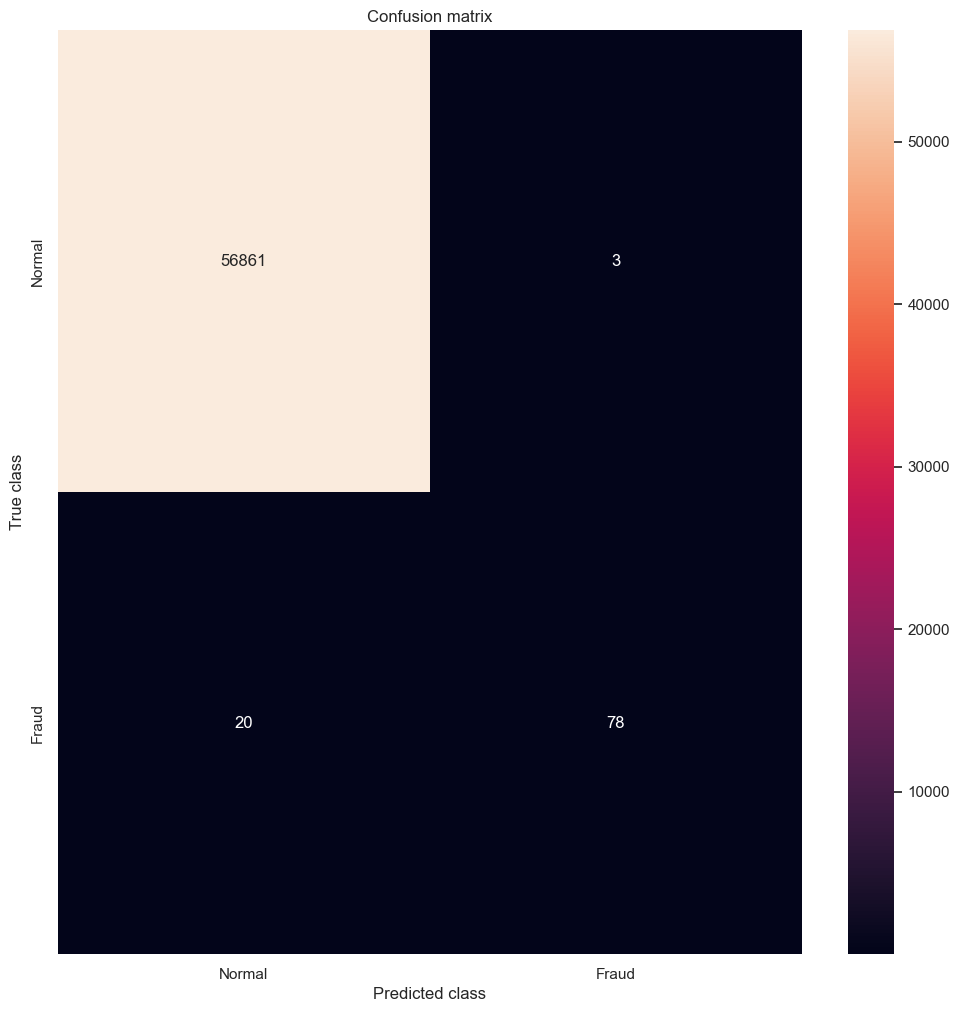

In [25]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, xgb_yhat)

print(confusion_matrix(yTest, xgb_yhat))

plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In this instance, the first row stands for positive, while the second row for negative. Thus, 68782 of them are real positives and 18 are false positives. That means that, of the total number of 68782+18=68800 transactions, 68782 were correctly identified as regular transactions, while the remaining 18 were mistakenly classed as normal but were really fraudulent.

##### There is 99.95% accuracy in detecting credit card fraud. This figure is not surprising given that the data is skewed towards one class. The good news is that our model is not overfitted, as revealed by the confusion matrix.
#### Concluding, XGBoost is the best model based on our accuracy score. 
